In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("dog.jpg").convert("L")   
image = np.array(image).astype(np.float32)
image

array([[ 89.,  88.,  88., ...,  61.,  61.,  60.],
       [ 89.,  89.,  88., ...,  61.,  61.,  60.],
       [ 90.,  89.,  89., ...,  61.,  61.,  61.],
       ...,
       [144., 144., 145., ..., 103., 103., 102.],
       [144., 144., 147., ..., 103., 103., 102.],
       [144., 145., 149., ..., 103., 103., 102.]], dtype=float32)

In [2]:
def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

gauss7 = gaussian_kernel(7, 1)

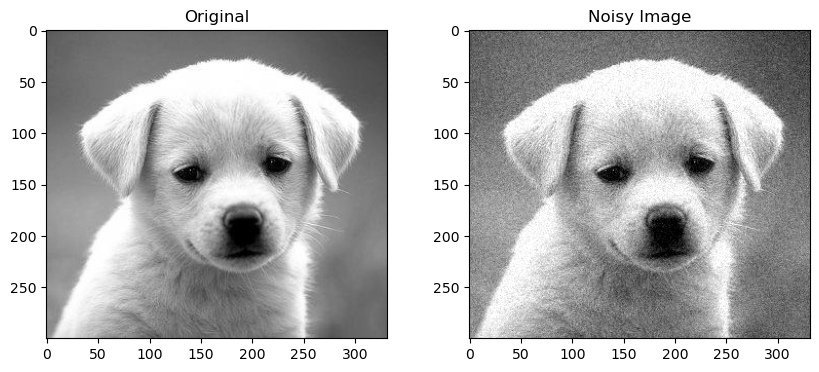

In [5]:
mean = 0
std = 15

noise = np.random.normal(mean, std, image.shape)
noisy_image = image + noise

noisy_image = np.clip(noisy_image, 0, 255)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1,2,2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.show()

In [6]:
def convolution(image, kernel):
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape
    
    kernel = np.flipud(np.fliplr(kernel))
    
    pad_h = kernel_h 
    pad_w = kernel_w
    
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    
    output = np.zeros_like(image)

    for i in range(image_h):
        for j in range(image_w):
            region = padded[i:i+kernel_h, j:j+kernel_w]
            output[i, j] = np.sum(region * kernel)
    
    return output

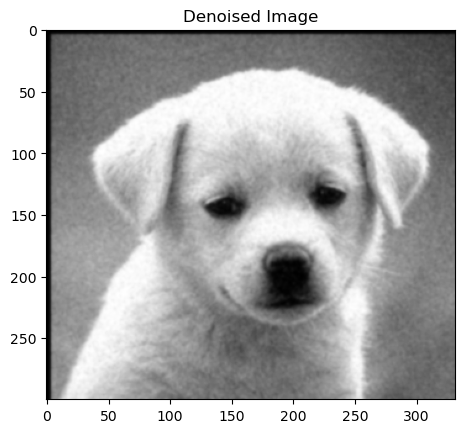

In [7]:
denoised = convolution(noisy_image, gauss7)

plt.imshow(denoised, cmap='gray')
plt.title("Denoised Image")
plt.show()

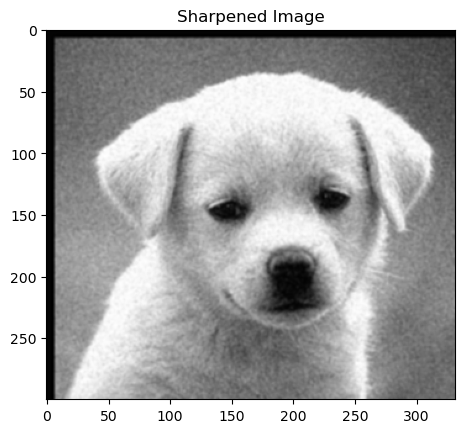

In [8]:
sharpening_kernel = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, -476, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]) * (-1.0 / 256.0)

sharpened = convolution(denoised, sharpening_kernel)

plt.imshow(sharpened, cmap='gray')
plt.title("Sharpened Image")
plt.show()